# Clean data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

import package_DBR
from package_DBR import myRound

# Load data

In [7]:
nameFile = 'Open_loop_experiment_on_DV_2024-03-18-17h38.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'
    
print(ExpVariable)    
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values

DV


# Plot loaded data

(25.0, 75.0)

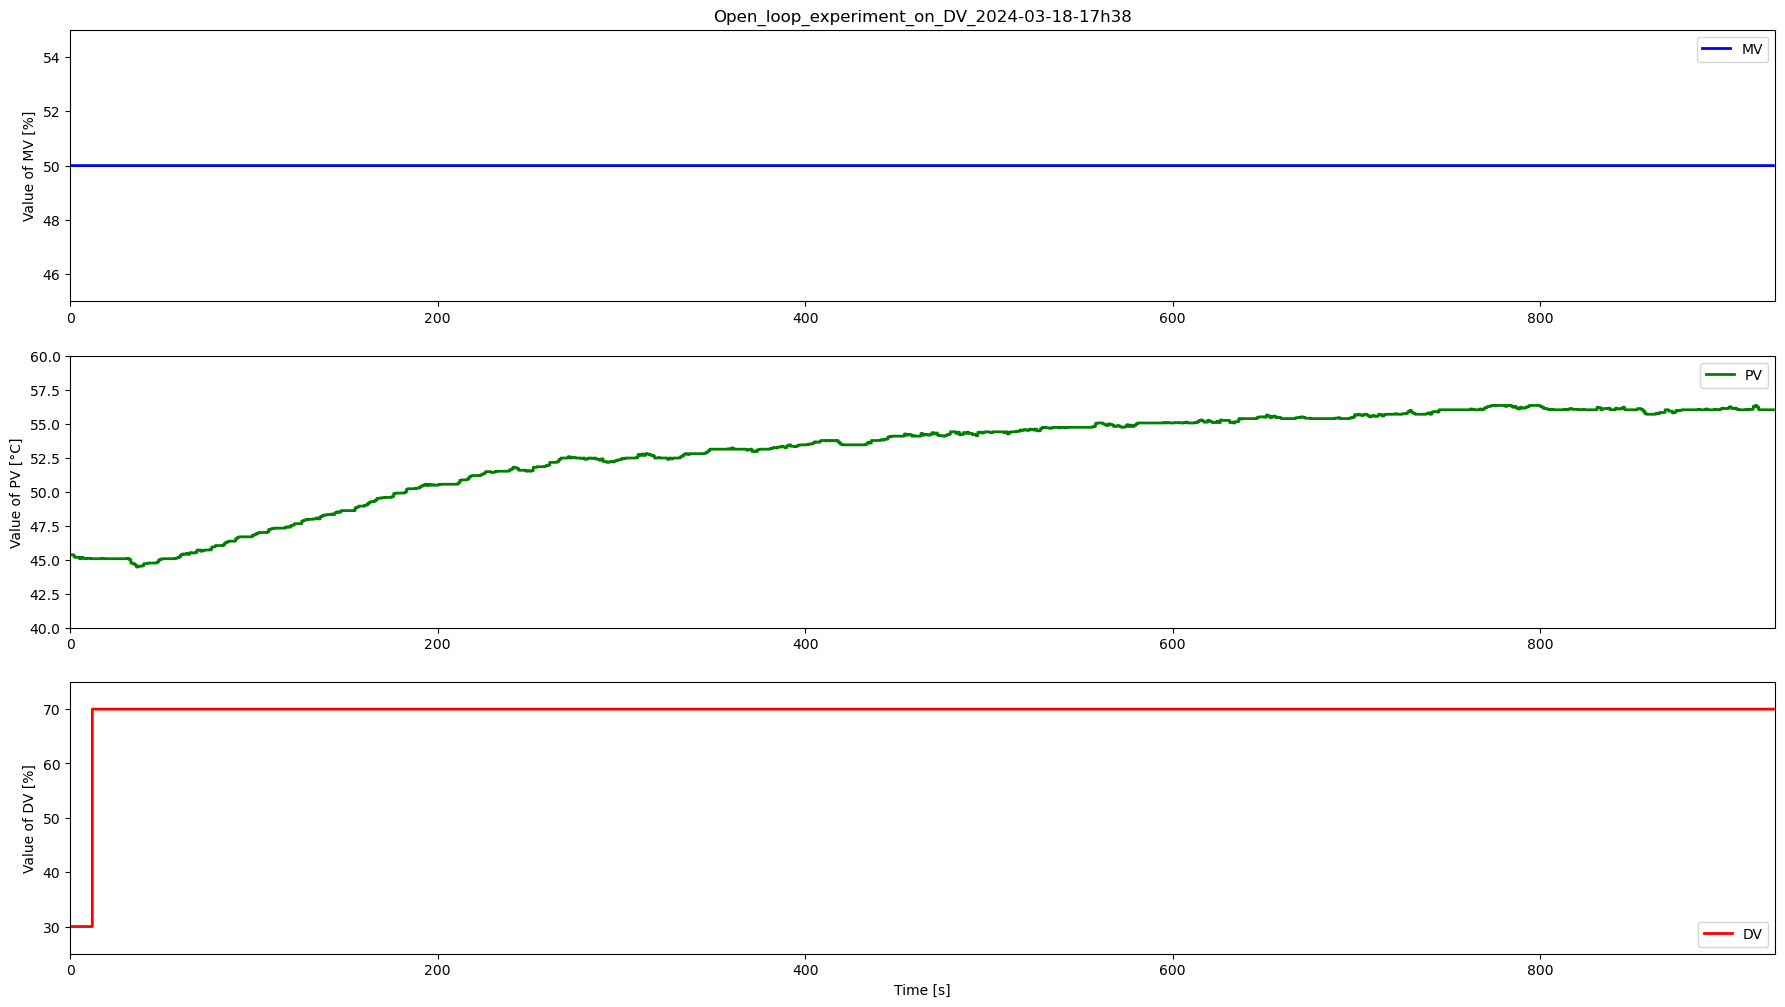

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t,MV)
l2.set_data(t,PV)
l3.set_data(t,DV)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)
ax3.set_xlim(0, t[-1]+1)

ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)

# Clean data

In [9]:
if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

# Plot cleaned data

<Figure size 2200x2200 with 0 Axes>

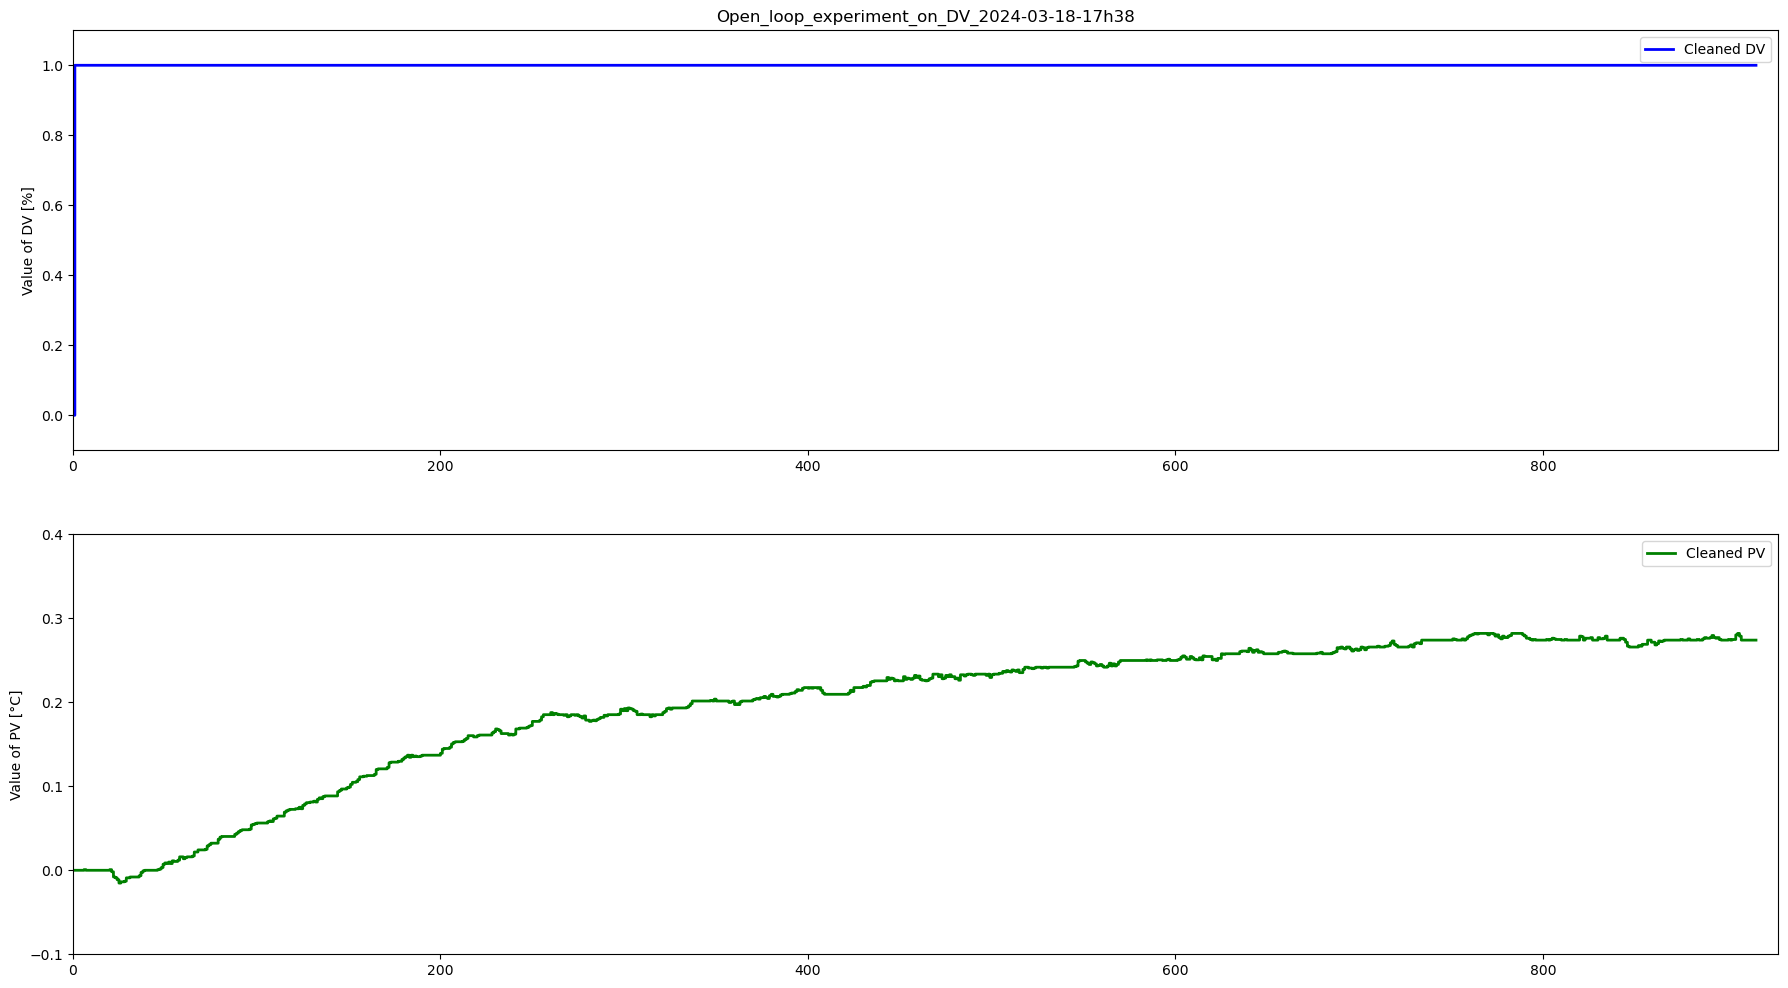

In [10]:
plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)

if ExpVariable == 'MV':
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
    ax1.set_ylabel('Value of MV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,MVm)
    ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
else:
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned DV',where='post')
    ax1.set_ylabel('Value of DV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,DVm)
    ax1.set_ylim(myRound(np.min(DVm),1)-0.1, myRound(np.max(DVm),1)+0.1)     

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)


# Save cleaned data
if ExpVariable == 'MV':
    my_data = np.vstack((tm.T,MVm.T,PVm.T))
else:
    my_data = np.vstack((tm.T,DVm.T,PVm.T))
my_data = my_data.T
nameFile = 'Data/Cleaned_data_' + titleName + '.txt'
if not os.path.exists('Data'):
    os.makedirs('Data')
if ExpVariable == 'MV':
    np.savetxt(nameFile,my_data,delimiter=',',header='tm,MVm,PVm',comments='') 
else:
    np.savetxt(nameFile,my_data,delimiter=',',header='tm,DVm,PVm',comments='')     